

## **PROJECT ON CUSTOMER CHURN IN BANK**






***About Dataset & Project:*** This dataset is about customer churn in bank. Here, we will have a look at the factors that affect churn in the banking industry. The time frame during which a customer is not conducting any transactions. Churn is indicated by periods longer. A high churn rate might reflect discontent with a good or service and have a negative influence MRR(monthly recurring revenue). Customer churn costs businesses approx. $1.6 trillion annually, according to one of the surveys.

***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np

***Loading a dataset***

In [2]:
df = pd.read_csv("/content/Churn dataset_Marketing Analysis project.csv")

***Quick view of the dataset***

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***Dropping unwanted columns and keeping only numerical data***

In [4]:
df1= df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***Statistical data of the dataset***

In [6]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

***Importing matplotlib and seaborn for visualization***

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

***Heat Map to find correlation between all columns***

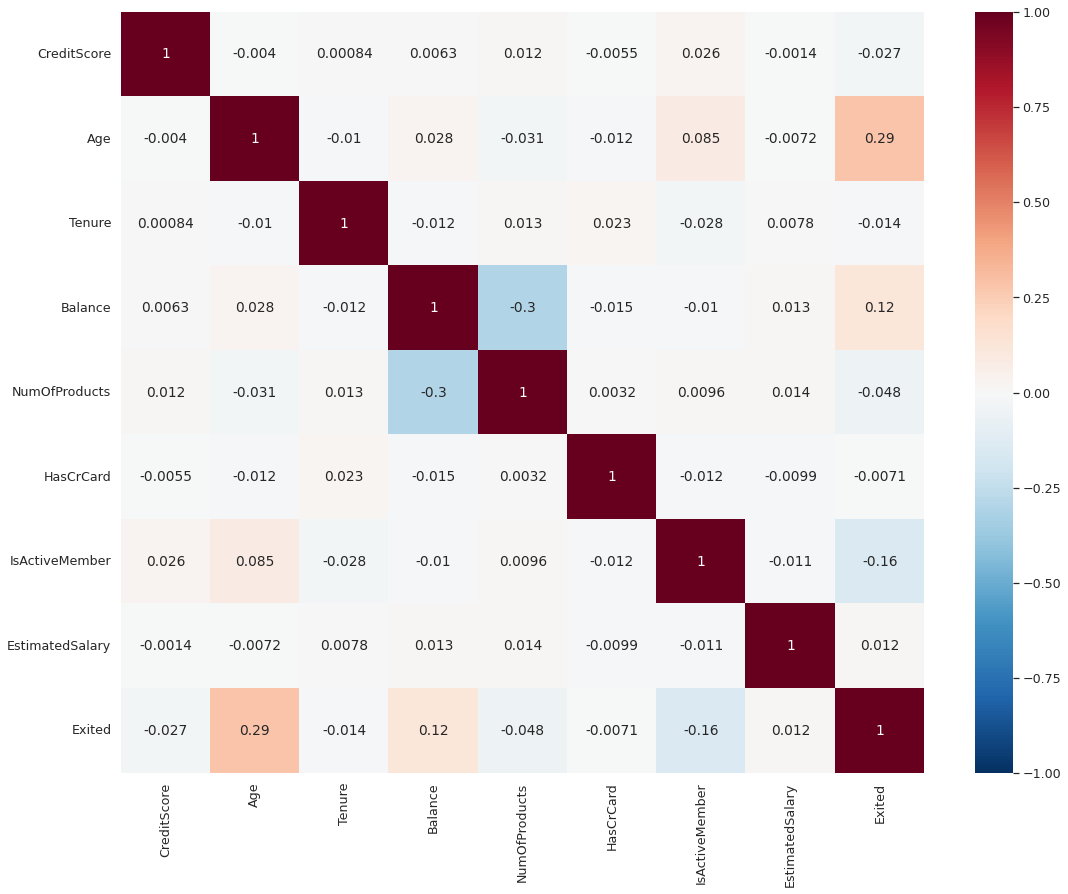

In [9]:
sns.set(font_scale=1.15)
plt.figure(figsize=(18,14))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

***Interpretation:*** In the given heat map we can clearly see that there is a positive relationship between "Age" and "Churn" i.e. 0.29.   
Additionally, there is a negative relationship between number of products and balance.

***Different pairplot to look relationship between columns***

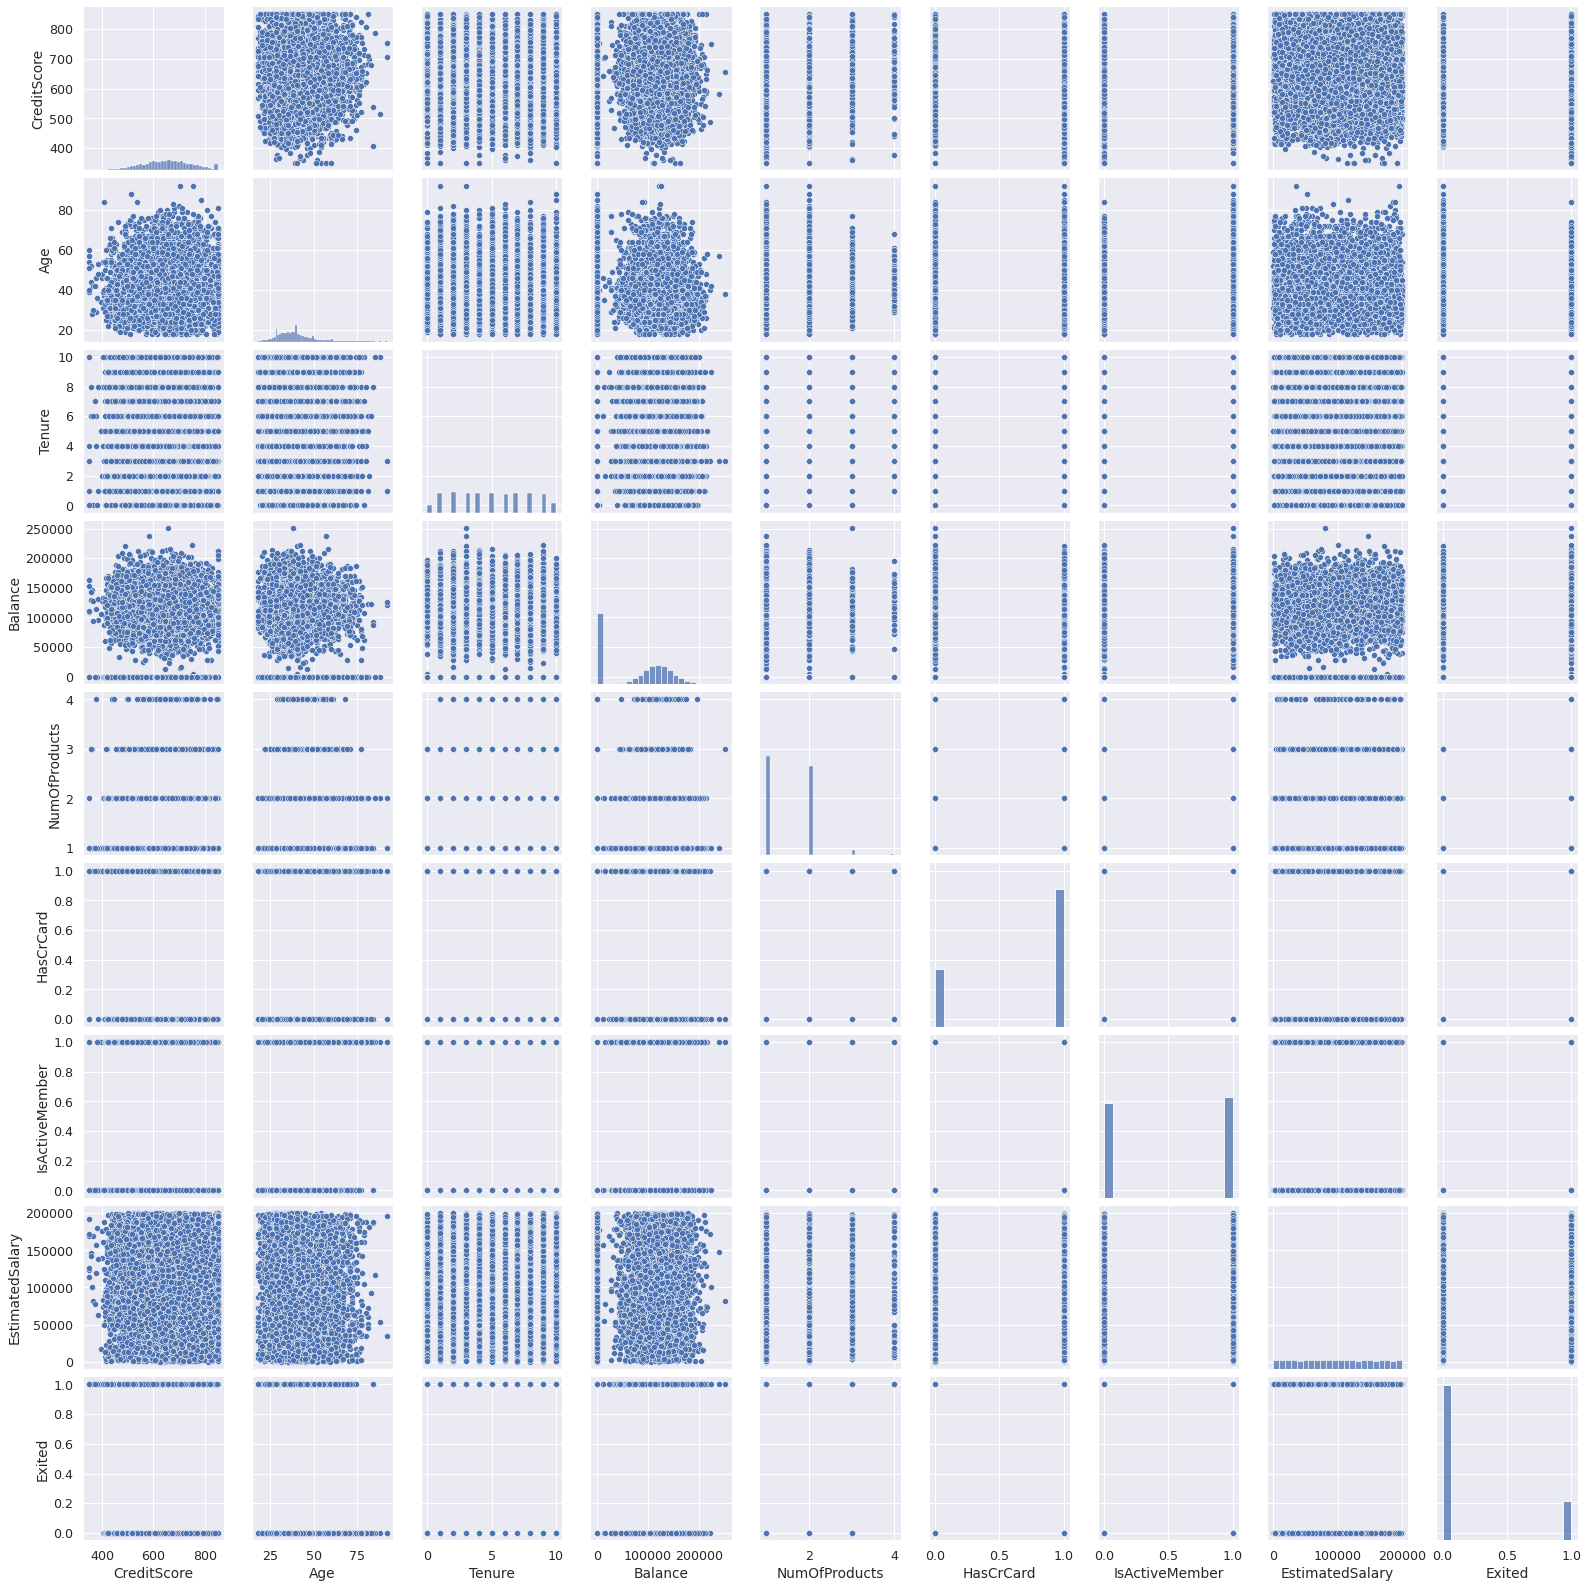

In [10]:
sns.pairplot(df1)

# ***ANALYSIS***




***Ques-1: Which gender has better credit score?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


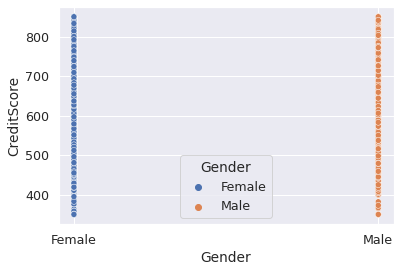

In [11]:
sns.scatterplot(df1['Gender'],df1['CreditScore'],hue=df1['Gender'])

***Interpretation:*** There is no relation between gender and credit score.

***Ques-2: Is there any relationship between age and credit score?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


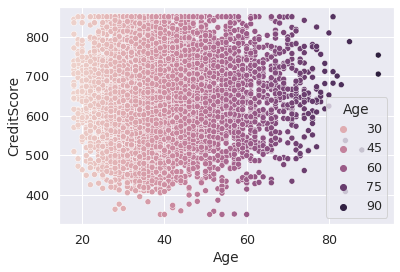

In [13]:
sns.scatterplot(df1['Age'],df1['CreditScore'],hue=df1['Age'])

***Interpretation:*** There is no subsequent relationship between age and credit score.

***Ques-3: Is there any relationship between estimated salary and credit score for different genders?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


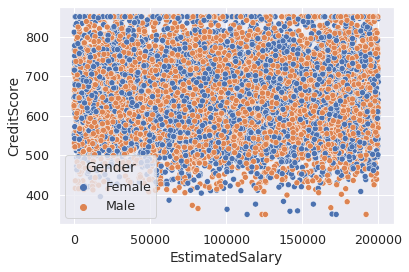

In [14]:
sns.scatterplot(df1['EstimatedSalary'],df1['CreditScore'],hue=df1['Gender'])

***Interpretation:*** The above graph clearly states that there is no relationship between estimated salary and credit score for different genders.

***Ques-4: How many people retained and churned out?***

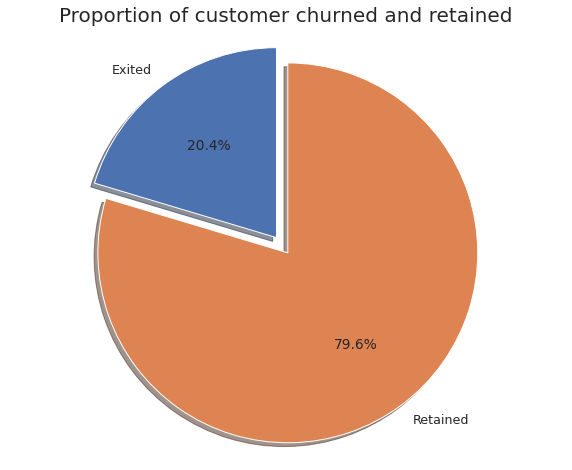

In [15]:
labels = 'Exited', 'Retained'
sizes = [df1.Exited[df1['Exited']==1].count(), df1.Exited[df1['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

***Interpretation:*** The graph shows the proportion of how many people churned and retained. The churn rate is 20.4% and retain rate is 79.6%.

***Ques-5: What is the relationship between churn (exited) and geography, gender, has credit card, is active member?***




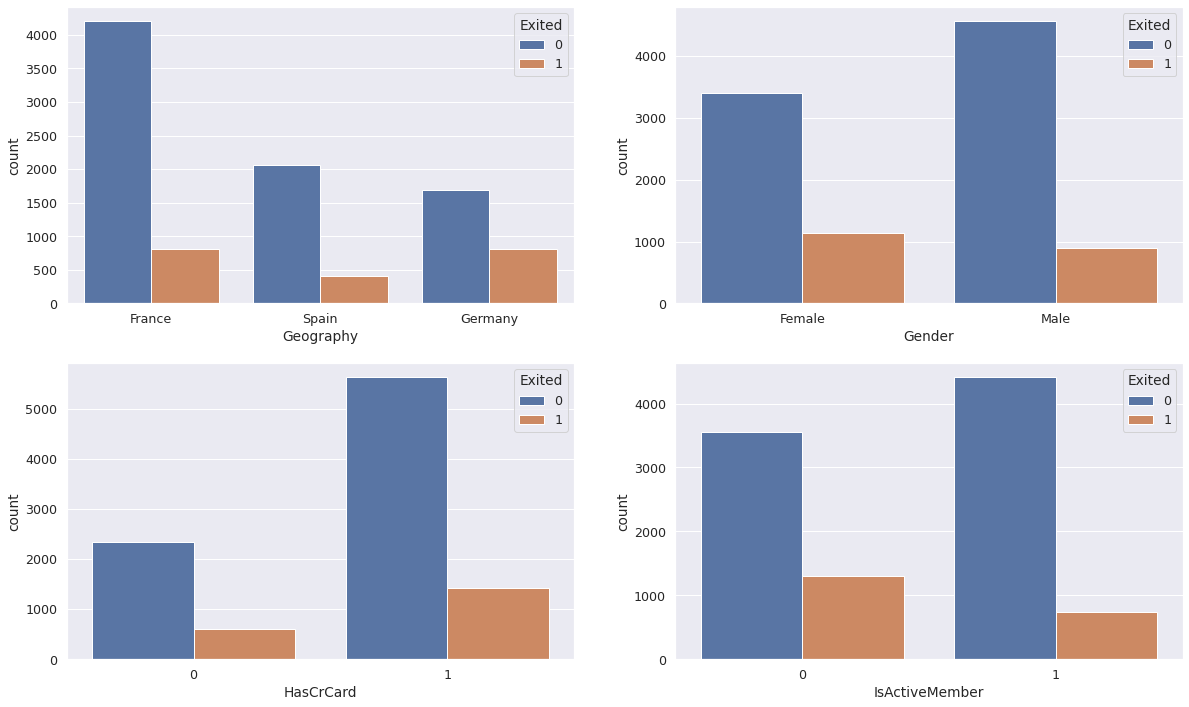

In [16]:
gig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df1, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df1, ax=axarr[1][1])

***Interpretation:*** These are 4 graphs depicting different relationships:
1. In Germany, there is a high churn rate that France and Spain. Whereas, Spain has lowest churn rate.
2. Females has slightly high churn rate as compared to males.
3. Customers who have credit card tend to exit more.
4. Customers who are active have high churn rate.

***Ques-6: What is the relationship between churn (exited) and Credit Score, Age, Tenure, Balance, Number of products, Estimated Salary?***

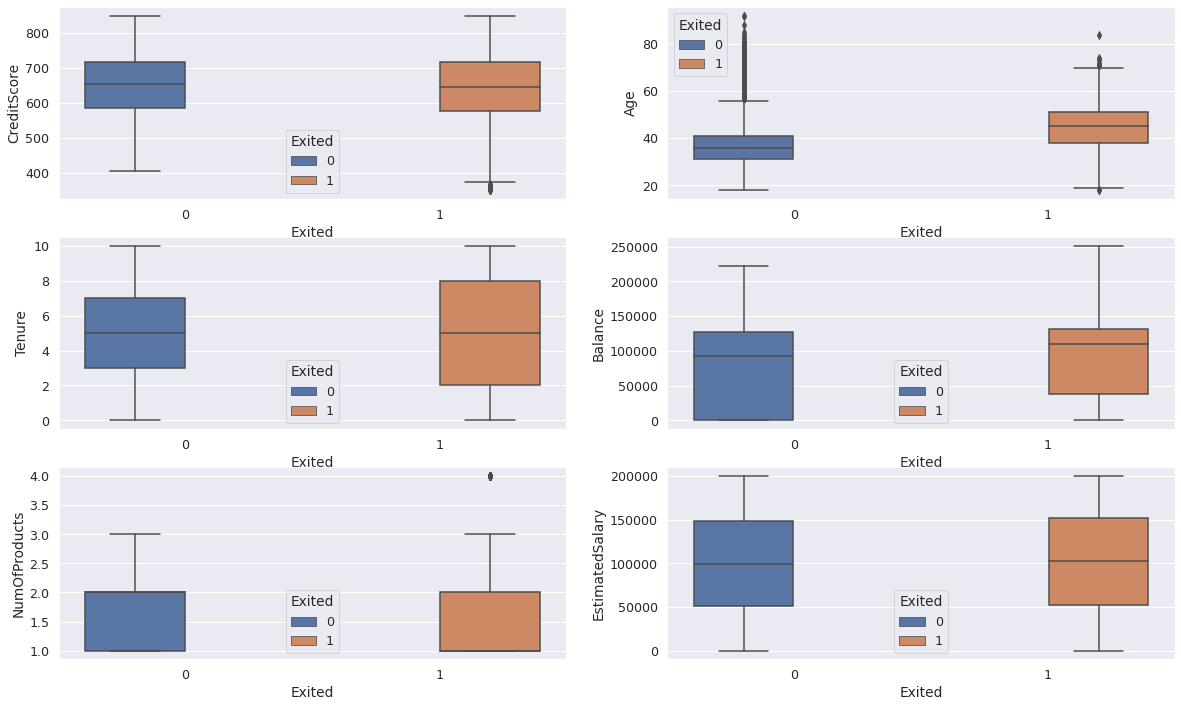

In [17]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df1 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][1])

***Interpretation:*** 

***Ques-7: Which gender has more churn rate?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


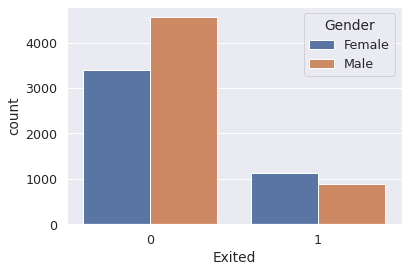

In [18]:
sns.countplot(df1['Exited'],hue=df1['Gender'])

***Ques-8: Is there is any relationship between estimated salary and age for males and females?***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


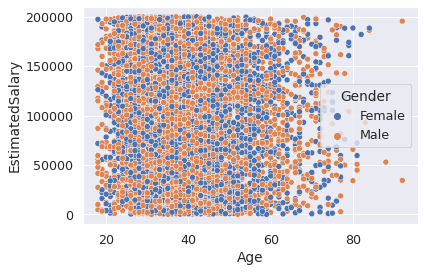

In [19]:
sns.scatterplot(df1['Age'],df1['EstimatedSalary'],hue=df1['Gender'])

### ***4. Feature engineering & Transformation***

1. Perform train test split
2. Most of the Features are categorical features, so we need to apply ONE-HOT encoding before fitting the model.
3. We can see the range of values are different in all the features, so it is better to scale the data before fitting the model.

In [20]:
X = df1.drop(['Exited'],axis=1)
y = df1['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


***Description:*** we have seen earlier that the salary has little effect on the chance of a customer churning.

However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

***Let's import libraries for prediction***

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

One-hot encoding is used below to convert our text columns into numerical. Example- Gender has "Male" & "Female" so we need to convert them in 0 and 1 because machine cannot understand text data.

In [23]:
ct = ColumnTransformer([("OneHotEncoding", OneHotEncoder(drop='first'),['Geography', 'Gender'],
                         ), ("Scaling", MinMaxScaler(), ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary',])])

In [24]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

##### ***Let's apply model fitting***

The ML models I have applied here are:
1. Random Forest
2. Logistic Regression
3. XGBoost

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier()
}

def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [27]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        #train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        #test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        #print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        #print(f'- COST: {test_cost}.')
        #cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list)), columns=['Model Name'])
        
    return report

In [28]:
report = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8420
- F1 score: 0.5587
- Precision: 0.6849
- Recall: 0.4717
- Roc Auc Score: 0.7067


Logistic Regression
Model performance for Training set
- Accuracy: 0.7955
- F1 score: 0.1771
- Precision: 0.4693
- Recall: 0.1091
- Roc Auc Score: 0.5390
----------------------------------
Model performance for Test set
- Accuracy: 0.7870
- F1 score: 0.2780
- Precision: 0.4940
- Recall: 0.1934
- Roc Auc Score: 0.5700


XGBClassifier
Model performance for Training set
- Accuracy: 0.8602
- F1 score: 0.5646
- Precision: 0.7592
- Recall: 0.4495
- Roc Auc Score: 0.7067
----------------------------------
Model performance for Test set
- Accuracy: 0.8490
- F1 score: 0.5782
- Precision: 0.7089
- Recall: 0.4882
- Roc Auc Score: 0.7171




***Description:*** In the above models, we can see that the accuracy for XGBoost is the highest i.e. 71% in the test dataset.

***Recommendations to reduce churn in the bank industry***

1. ***Engage with your customers:*** We should regularly communicate with customers to create the rapport with them. We can do this through emails, newsletter, social media, etc.
2. ***Educate the customer:*** Provide free webinars, training sessions, video tutorials, and product demonstrations – whatever it takes to reassure and inform your clients.
3. ***Offer incentives:*** Offering incentives to clients who were predicted to defect, like discounts and special offers, is another smart move.
4. ***Target the right audience:*** If your first communication with a consumer is all about "free" and "cheap," you run the danger of luring customers who aren't interested in the value you offer. The majority of these "freebie" collectors are prone to dispersing.
5. ***Give better service:*** Ineffective and unprofessional employees as well as excruciatingly slow service are the two main reasons why customers abandon the business. Research from Forum Corporation states that 70% of churn is attributable to subpar service.
6. ***Pay attention to complaints:*** 96% of dissatisfied clients remain silent, and 91% of them just quit and never return?
7. ***Make your best people deal with cancellations:*** The majority of respondents to the Customer Service Group's survey on customer satisfaction stated that getting their problem fixed was not as important as being heard and appreciated.